In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()
sns.set_style("whitegrid")

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [3]:
mldata = pd.read_csv("mldata.csv")

In [6]:
# Preprocessing LinReg with "post_click_sales_amount" as target

# all Campaigns
mldata_camp_total = mldata

# Only Camp 1
mldata_camp_1 = mldata[mldata["campaign_number"] == "camp 1"]

# Only Camp 2
mldata_camp_2 = mldata[mldata["campaign_number"] == "camp 2"]

# Only Camp 3
mldata_camp_3 = mldata[mldata["campaign_number"] == "camp 3"]


# Selection of selected features relevant for ML - without "campaign_number" as feature - with "post_click_sales_amount" as label:

# all Campaigns
mldata_camp_total = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 1
mldata_camp_1 = mldata_camp_1[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 2
mldata_camp_2 = mldata_camp_2[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 3
mldata_camp_3 = mldata_camp_3[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

mldata_camp_3.head()

,banner,placement,ad_spend_by_company_x,post_click_sales_amount
0,160 x 600,def,0.2096,0.0000
1,160 x 600,ghi,0.0000,0.0000
2,160 x 600,mno,2.6210,532.0745
3,160 x 600,abc,0.0000,0.0000
4,160 x 600,def,1.1008,0.0000


Koeffizienten:  [[9392.05256281  195.30248141  312.41433955  -24.98814836   70.74074116
    12.10914786  336.4614013   -85.61125585  120.19402826  353.99168587
    77.82386957  548.07988522]]
Konstante, wenn alle Variablen 0 sind: [2188.86390188]


The model performance for test set
--------------------------------------
MAE: 1578.4259087165292
MSE: 24534156.675472114
RMSE: 4953.196611832818
R2 score is 0.7723495090542821


Regressionsergebnisse für Trainingsdatensatz:
                               OLS Regression Results                              
Dep. Variable:     post_click_sales_amount   R-squared:                       0.797
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     3281.
Date:                     Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                             14:08:32   Log-Likelihood:                -99544.
No. Observations:     

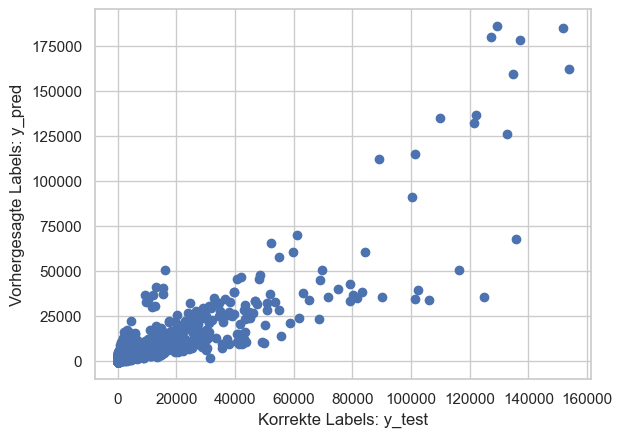

In [9]:
### Linear Ridge Regression - All Campaigns  ###

# Define the features(X) and the label(y)
X = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_total[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Standardisation: Many variables in X, with different scales/scaling => therefore standardisation of the data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=100)

# Initialise the model for the ridge regression - 
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

# Train model
ridge_reg.fit(X_train, y_train)

# Coefficients:
print('Koeffizienten: ', ridge_reg.coef_)
print("Konstante, wenn alle Variablen 0 sind:", ridge_reg.intercept_)

# Make predictions
y_pred = ridge_reg.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct Labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Adapting the model
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train, columns=scaled_X.columns)))
results = model.fit()
# Output results
print("Regression results for training data set:") 
print(results.summary())
print("\n")
print(results.params)

Koeffizienten:  [[13074.75967779   490.25148892   546.75128848  -347.75622412
     30.20081705  -275.45423003   617.27756033  -358.40447043
    361.96732439  1092.17185785   265.06155737  1677.60588226]]
Konstante, wenn alle Variablen 0 sind: [4589.58419151]


The model performance for test set
--------------------------------------
MAE: 3010.021634048733
MSE: 47291865.5517793
RMSE: 6876.908138966181
R2 score is 0.7967293182083269


Regressionsergebnisse für Trainingsdatensatz:
                               OLS Regression Results                              
Dep. Variable:     post_click_sales_amount   R-squared:                       0.816
Model:                                 OLS   Adj. R-squared:                  0.815
Method:                      Least Squares   F-statistic:                     1657.
Date:                     Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                             08:00:59   Log-Likelihood:                -46030.
No. Observati

c:\Users\Oliver\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Oliver\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


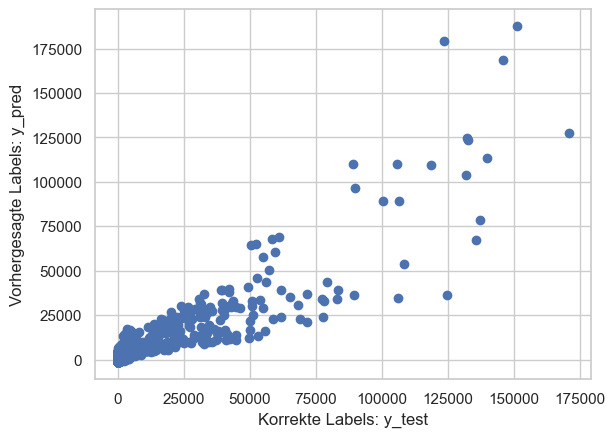

In [24]:
### Linear Ridge Regression - Campaign 1  ###

# Define the features(X) and the label(y)
X = mldata_camp_1[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_1[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Standardisation: Many variables in X, with different scales/scaling => therefore standardisation of the data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=100)

# Initialise the model for the ridge regression - 
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

# Train model
ridge_reg.fit(X_train, y_train)

# Coefficients:
print('Koeffizienten: ', ridge_reg.coef_)
print("Konstante, wenn alle Variablen 0 sind:", ridge_reg.intercept_)

# Make predictions
y_pred = ridge_reg.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct Labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Adapting the model
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train, columns=scaled_X.columns)))
results = model.fit()
# Output results
print("Regression results for training data set:") 
print(results.summary())
print("\n")
print(results.params)

Koeffizienten:  [[1932.88170109   64.32999227  185.25320417   86.18918454  -14.51102216
    92.01171601  207.94305355   27.64034907   13.67541579   54.28449796
    23.27867638   95.6688617 ]]
Konstante, wenn alle Variablen 0 sind: [767.97249276]


The model performance for test set
--------------------------------------
MAE: 393.4744151439346
MSE: 500182.4128422769
RMSE: 707.2357547821497
R2 score is 0.890763009288074


Regression results for training data set:
                               OLS Regression Results                              
Dep. Variable:     post_click_sales_amount   R-squared:                       0.503
Model:                                 OLS   Adj. R-squared:                  0.497
Method:                      Least Squares   F-statistic:                     87.05
Date:                     Wed, 25 Sep 2024   Prob (F-statistic):          2.28e-147
Time:                             22:44:13   Log-Likelihood:                -9325.5
No. Observations:             

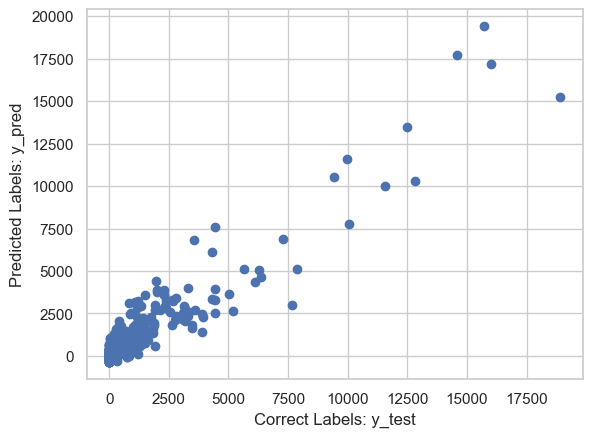

In [27]:
### Linear Ridge Regression - Campaign 2 ###

# Define the features(X) and the label(y)
X = mldata_camp_2[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_2[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Standardisation: Many variables in X, with different scales/scaling => therefore standardisation of the data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=100)

# Initialise the model for the ridge regression - 
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

# Train model
ridge_reg.fit(X_train, y_train)

# Coefficients:
print('Koeffizienten: ', ridge_reg.coef_)
print("Konstante, wenn alle Variablen 0 sind:", ridge_reg.intercept_)

# Make predictions
y_pred = ridge_reg.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct Labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Adapting the model
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train, columns=scaled_X.columns)))
results = model.fit()
# Output results
print("Regression results for training data set:") 
print(results.summary())
print("\n")
print(results.params)

Koeffizienten:  [[ 27.89020355  25.84635908  19.79614491 -16.34582232   1.12545292
  -11.67790903  11.34180507 -16.16651977  14.26889312  30.60731445
    7.10472561  60.13642414]]
Konstante, wenn alle Variablen 0 sind: [65.00045801]


The model performance for test set
--------------------------------------
MAE: 142.9779186865036
MSE: 1752876.9880564034
RMSE: 1323.9626082546301
R2 score is 0.008435055974752137


Regressionsergebnisse für Trainingsdatensatz:
                               OLS Regression Results                              
Dep. Variable:     post_click_sales_amount   R-squared:                       0.087
Model:                                 OLS   Adj. R-squared:                  0.085
Method:                      Least Squares   F-statistic:                     35.77
Date:                     Mon, 23 Sep 2024   Prob (F-statistic):           2.39e-80
Time:                             22:05:21   Log-Likelihood:                -31114.
No. Observations:                 

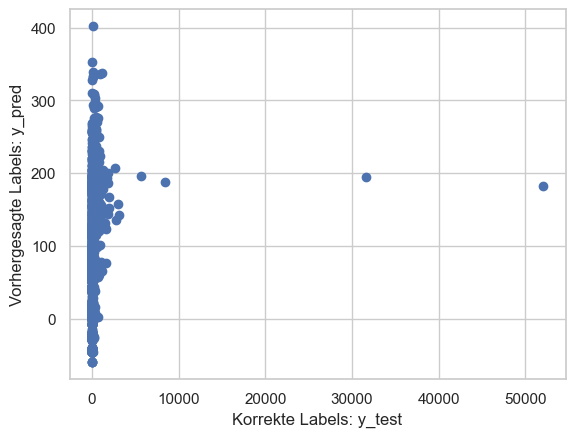

In [21]:
### Linear Ridge Regression - Campaign 3  ###

# Define the features(X) and the label(y)
X = mldata_camp_3[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_3[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Standardisation: Many variables in X, with different scales/scaling => therefore standardisation of the data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=100)

# Initialise the model for the ridge regression - 
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

# Train model
ridge_reg.fit(X_train, y_train)

# Coefficients:
print('Koeffizienten: ', ridge_reg.coef_)
print("Konstante, wenn alle Variablen 0 sind:", ridge_reg.intercept_)

# Make predictions
y_pred = ridge_reg.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct Labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Adapting the model
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train, columns=scaled_X.columns)))
results = model.fit()
# Output results
print("Regression results for training data set:") 
print(results.summary())
print("\n")
print(results.params)

Koeffizienten:  [ 9.39179484e+03  1.91863012e+02  3.07178979e+02 -2.64030616e+01
  6.84640028e+01  8.67683391e+00  3.31320900e+02 -8.57350628e+01
  1.07542928e+02  3.41512876e+02  6.74822307e+01  5.34510260e+02]
Konstante, wenn alle Variablen 0 sind: [2188.77863168]


The model performance for test set
--------------------------------------
MAE: 1577.3308954831898
MSE: 24533959.985828318
RMSE: 4953.176756974085
R2 score is 0.7723513341218631


Regressionsergebnisse für Trainingsdatensatz:
                               OLS Regression Results                              
Dep. Variable:     post_click_sales_amount   R-squared:                       0.797
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     3281.
Date:                     Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                             21:00:41   Log-Likelihood:                -99544.
No

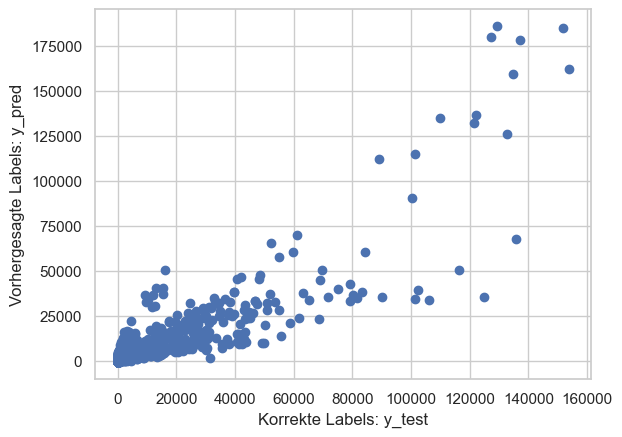

In [13]:
### Linear Lasso Regression - All Campaigns  ###

# Define the features(X) and the label(y)
X = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_total[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Standardisation: Many variables in X, with different scales/scaling => therefore standardisation of the data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=100)

# Initialise the model for lasso regression
lasso_reg = Lasso(alpha=1)

# Train the model:
lasso_reg.fit(X_train, y_train)

# Coefficients:
print('Coefficients: ', lasso_reg.coef_)
print("Constant if all variables are 0:", lasso_reg.intercept_)

# Make predictions
y_pred = lasso_reg.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: Adapting the model
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Output results
print("Regression results for training data set:")
print(results.summary())
print("\n")
print(results.params)